In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import shap
import warnings
import missingno as msno
np.random.seed(123)

In [2]:
# Read data
df = pd.read_csv('C:\\Users\\user\\Desktop\\EMORY\\intro to BA\\finalproject\\ds_salaries.csv')

In [3]:
# DATA Distribution
cat = ['experience_level','employment_type','job_title', 'salary_currency','employee_residence', 'company_location', 'company_size']
num = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
# Numeric attributes
df_num = df[num].describe()
df_num.loc['skewness'] = df[num].skew()
df_num.loc['kurtosis'] = df[num].kurtosis()
df_num

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000
skewness,-1.016374,2.893793e+01,0.536401,0.149454
kurtosis,1.127965,1.147567e+03,0.834006,-1.925036


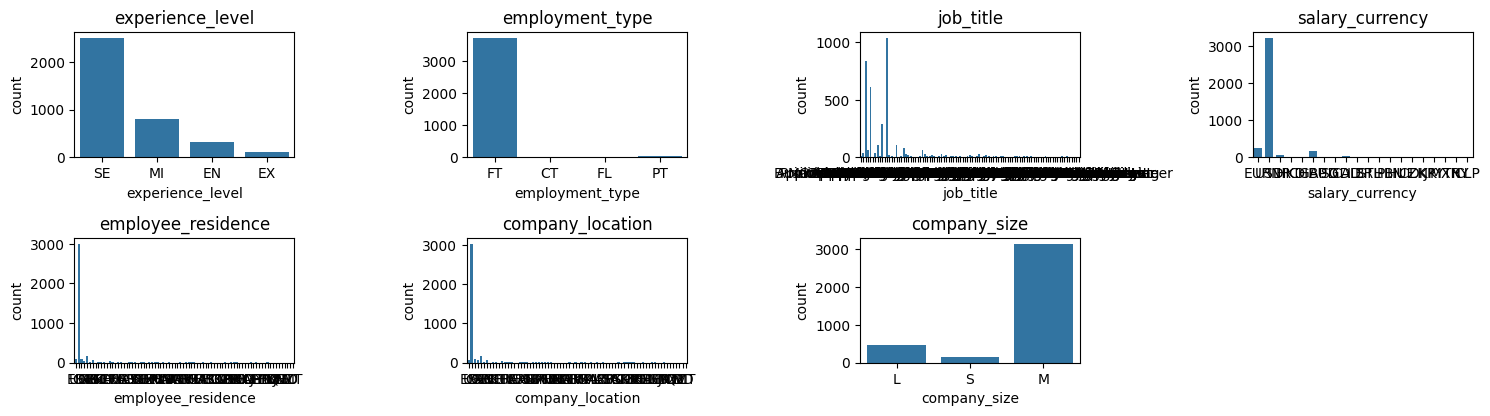

In [6]:
# Categorical attributes
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat):
    plt.subplot(5, 4, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.tight_layout()

plt.show()

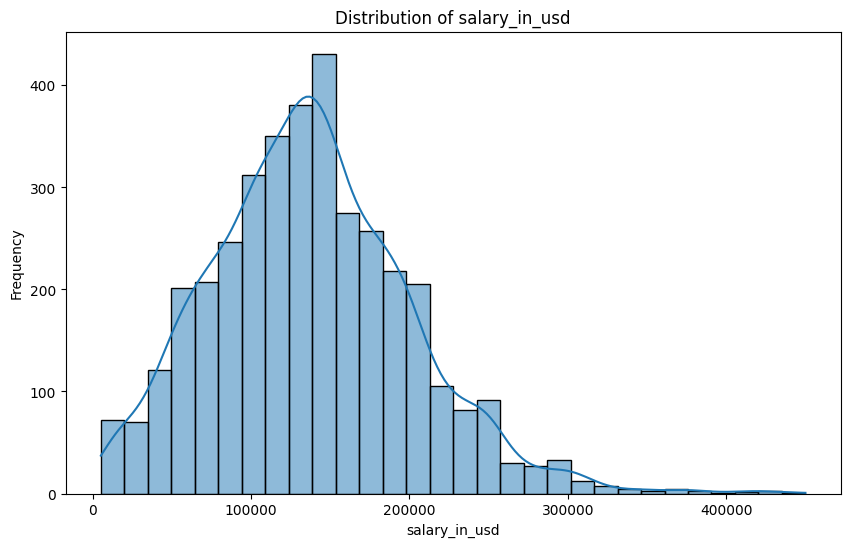

In [29]:
## Target variable attribute
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30)
plt.title('Distribution of salary_in_usd')
plt.xlabel('salary_in_usd')
plt.ylabel('Frequency')
plt.show()

In [30]:
# Discretize the target variable
bins = [0, 80000, 120000, float('inf')]
labels = ['low_package', 'avg_package', 'big_package']

# Discretize the salary_in_usd column
df['salary_bin'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame with the discretized column
print(df[['salary_in_usd', 'salary_bin']])


      salary_in_usd   salary_bin
0             85847  avg_package
1             30000  low_package
2             25500  low_package
3            175000  big_package
4            120000  big_package
...             ...          ...
3750         412000  big_package
3751         151000  big_package
3752         105000  avg_package
3753         100000  avg_package
3754          94665  avg_package

[3755 rows x 2 columns]


## Unsupervised learning
## k-mean clustering
#### feature selections: Experience level, Job title, Employment type, Employee residence, Remote work ratio, Company location, Company Size


In [7]:
import pandas as pd

# Load your data (assuming 'df' is your DataFrame)
features = df[['salary_in_usd', 'experience_level', 'employment_type',
               'job_title', 'employee_residence', 'company_location', 'company_size', 'remote_ratio']].dropna()

# One-hot encoding for categorical variables using pd.get_dummies
categorical_columns = ['experience_level', 'employment_type',   
                       'job_title', 'employee_residence', 'company_location', 'company_size']
encoded_df = pd.get_dummies(features[categorical_columns], drop_first=True)
encoded_df = encoded_df.astype(int)


# Combine the encoded data with the numerical data
numeric_data = features[['salary_in_usd', 'remote_ratio']]
final_df = pd.concat([numeric_data, encoded_df], axis=1)

# Display the DataFrame to check it
print(final_df.head())




   salary_in_usd  remote_ratio  experience_level_EX  experience_level_MI  \
0          85847           100                    0                    0   
1          30000           100                    0                    1   
2          25500           100                    0                    1   
3         175000           100                    0                    0   
4         120000           100                    0                    0   

   experience_level_SE  employment_type_FL  employment_type_FT  \
0                    1                   0                   1   
1                    0                   0                   0   
2                    0                   0                   0   
3                    1                   0                   1   
4                    1                   0                   1   

   employment_type_PT  job_title_AI Developer  job_title_AI Programmer  ...  \
0                   0                       0                      

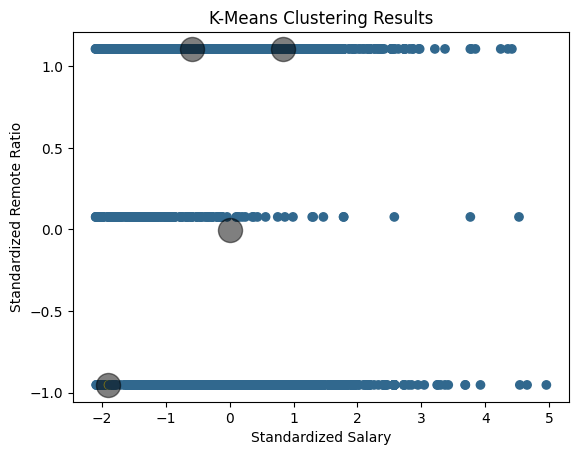

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(final_df)

# K-Means clusturing
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X_std)


plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)
plt.xlabel('Standardized Salary')
plt.ylabel('Standardized Remote Ratio')
plt.title('K-Means Clustering Results')
plt.show()


## Supervise Learning
# linear regression

In [14]:

sorted_centers = [10000, 50000, 90000] 


try:
    boundaries = [(sorted_centers[i] + sorted_centers[i+1]) / 2 for i in range(len(sorted_centers)-1)]
except TypeError as e:
    print(f"TypeError: {e}")


print(boundaries)


[30000.0, 70000.0]


In [15]:
unique_job_titles = df['job_title'].unique()

print("Unique Job Titles:")
for title in unique_job_titles:
    print(title)

Unique Job Titles:
Principal Data Scientist
ML Engineer
Data Scientist
Applied Scientist
Data Analyst
Data Modeler
Research Engineer
Analytics Engineer
Business Intelligence Engineer
Machine Learning Engineer
Data Strategist
Data Engineer
Computer Vision Engineer
Data Quality Analyst
Compliance Data Analyst
Data Architect
Applied Machine Learning Engineer
AI Developer
Research Scientist
Data Analytics Manager
Business Data Analyst
Applied Data Scientist
Staff Data Analyst
ETL Engineer
Data DevOps Engineer
Head of Data
Data Science Manager
Data Manager
Machine Learning Researcher
Big Data Engineer
Data Specialist
Lead Data Analyst
BI Data Engineer
Director of Data Science
Machine Learning Scientist
MLOps Engineer
AI Scientist
Autonomous Vehicle Technician
Applied Machine Learning Scientist
Lead Data Scientist
Cloud Database Engineer
Financial Data Analyst
Data Infrastructure Engineer
Software Data Engineer
AI Programmer
Data Operations Engineer
BI Developer
Data Science Lead
Deep Learni

In [16]:
import pandas as pd


job_category_map = {
    'Principal Data Scientist': 'Data Scientist',
    'ML Engineer': 'Machine Learning Engineer',
    'Data Scientist': 'Data Scientist',
    'Applied Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Data Modeler': 'Data Engineer',
    'Research Engineer': 'Research & Development',
    'Analytics Engineer': 'Other',
    'Business Intelligence Engineer': 'Other',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Data Strategist': 'Other',
    'Data Engineer': 'Data Engineer',
    'Computer Vision Engineer': 'Machine Learning Engineer',
    'Data Quality Analyst': 'Other',
    'Compliance Data Analyst': 'Data Analyst',
    'Data Architect': 'Data Engineer',
    'Applied Machine Learning Engineer': 'Machine Learning Engineer',
    'AI Developer': 'Machine Learning Engineer',
    'Research Scientist': 'Research & Development',
    'Data Analytics Manager': 'Data Analyst',
    'Business Data Analyst': 'Data Analyst',
    'Applied Data Scientist': 'Data Scientist',
    'Staff Data Analyst': 'Data Analyst',
    'ETL Engineer': 'Data Engineer'
}

df['job_category'] = df['job_title'].map(job_category_map)


salary_medians = df.groupby('job_category')['salary_in_usd'].median().sort_values()


print(salary_medians)


job_category
Data Analyst                 106020.0
Data Engineer                138750.0
Other                        143200.0
Data Scientist               143550.0
Machine Learning Engineer    150000.0
Research & Development       150000.0
Name: salary_in_usd, dtype: float64


In [17]:
import pandas as pd


job_category_dummies = pd.get_dummies(df['job_category'], prefix='Category')


print(job_category_dummies.head())


df = pd.concat([df, job_category_dummies], axis=1)


print(df.head())


   Category_Data Analyst  Category_Data Engineer  Category_Data Scientist  \
0                  False                   False                     True   
1                  False                   False                    False   
2                  False                   False                    False   
3                  False                   False                     True   
4                  False                   False                     True   

   Category_Machine Learning Engineer  Category_Other  \
0                               False           False   
1                                True           False   
2                                True           False   
3                               False           False   
4                               False           False   

   Category_Research & Development  
0                            False  
1                            False  
2                            False  
3                            False  
4        

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'final_df' is your DataFrame after encoding and concatenating

# Define the target and features
X = final_df.drop('salary_in_usd', axis=1)  # Features
y = final_df['salary_in_usd']               # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2:.2f}')

# Optionally, show coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R² score: 0.37
Coefficients: [-3.78703686e+00  8.95150230e+04  2.02054777e+04  4.45241280e+04
 -8.13345978e+04 -6.85494147e+02 -3.03040355e+04  1.19384214e+05
 -7.18982847e-08  2.80191055e+04  5.54485451e+03  6.99810734e+04
  5.52283876e+04  1.87163870e+04  3.91474659e+04  6.24004315e-09
  2.34354420e+04 -1.23971166e+03 -1.50273391e+04 -5.13334603e+04
 -2.68977213e+04  4.59268019e+03  1.56408707e+04 -2.80526754e+04
  2.38303747e+04  9.33894035e+04  4.86258938e+04 -2.24850239e+03
 -9.35844397e+04  3.45422333e+04 -1.53712410e+04 -2.80979921e+04
 -1.91025944e+04 -1.13541992e+04  2.48578755e+05 -2.92386812e+03
 -6.12362920e+04  5.99821805e+03  1.33276376e+03  1.31750074e+03
  4.49078504e+04  5.62637080e+04 -1.75642866e+04 -1.89617732e+04
 -3.73362920e+04 -6.59838229e+04 -4.28571389e+04 -6.62603131e+04
 -1.99278966e+04 -1.91649655e+04  2.53048038e+04  4.38960522e+04
 -4.65661287e-10  6.26752196e+03  2.65787553e+04 -3.52335361e+04
 -8.14907253e-10  4.62260557e+03 -6.40284270e-10  3.41425996e

In [20]:
from sklearn.metrics import mean_squared_error

# Continue from your previous model predictions

# Calculate the RMSE for the Linear Regression model
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)
print(f"Linear Regression RMSE: {rmse_lr}")


Linear Regression RMSE: 50059.76006870256


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Hyperparameter Tuning

In [22]:
# Define the target and features
X = final_df.drop('salary_in_usd', axis=1)  # Features
y = final_df['salary_in_usd']               # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the Ridge regression model with GridSearchCV to tune the alpha parameter
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Example range of alpha
ridge = Ridge()
clf = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
clf.fit(X_train, y_train)

# Best parameter and model
print("Best parameters found: ", clf.best_params_)
best_ridge = clf.best_estimator_

# Predict on the test set with the best model
y_pred_ridge = best_ridge.predict(X_test)

# Calculate the RMSE for the Ridge Regression model
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
print(f"Ridge Regression RMSE: {rmse_ridge}")


Best parameters found:  {'alpha': 10}
Ridge Regression RMSE: 48134.00058102315


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


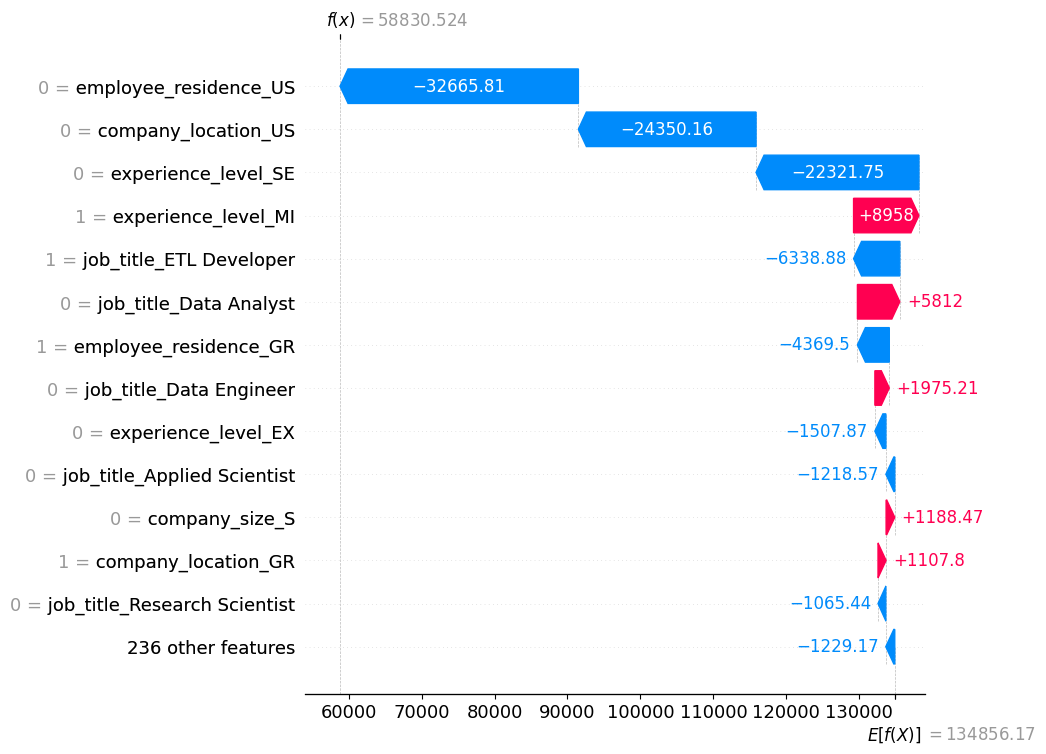

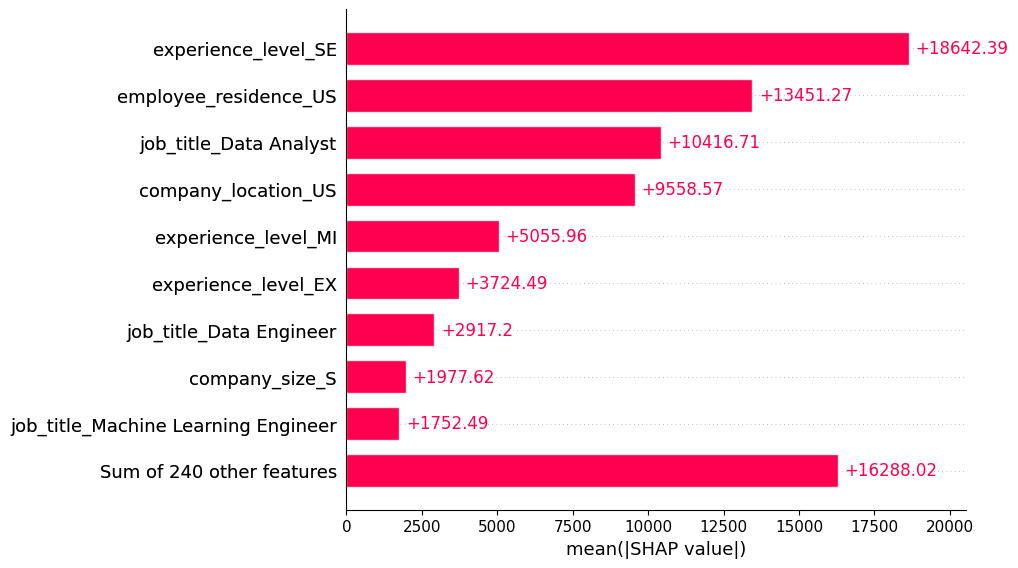

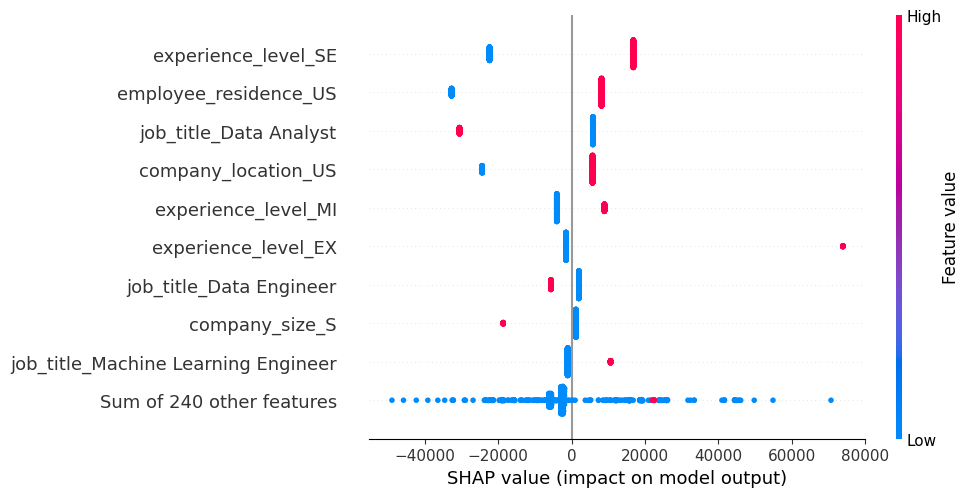

In [27]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume 'final_df' is your full DataFrame prepared earlier
X = final_df.drop('salary_in_usd', axis=1)
y = final_df['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You should have defined 'best_ridge' somewhere as your trained Ridge model from previous steps
explainer = shap.Explainer(best_ridge, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Plot the SHAP values for a single prediction
shap.plots.waterfall(shap_values[10], max_display=14)  # max_display controls how many features to show

# Aggregate SHAP values and plot the bar chart for overall feature importance
shap.plots.bar(shap_values)

# Beeswarm plot to show the distribution of the impacts each feature has on the model output
shap.plots.beeswarm(shap_values)
